# Explore here

1)Planteamiento del problema y recopilación de datos

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [1]:
#Importa las librerias
import pandas as pd 

#Se carga informacion del archivo 
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

#Se lee la data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


2) Exploración y limpieza de datos

In [2]:
#Revision del nivel de datos 
data.shape

# se tiene 41188 filas y 21 columnas 

(41188, 21)

In [3]:
#Obtener informacion del tipo de datos 

data.info()

#No existen valores nulos , todos tienen el mismo numero de filas 41188
#Datos categoricos: job,  marital, education, default, housing, loan, contact , month, day_of_week, poutcome, y
#Datos numericos :age, duration, campaign, pdays , previous, emp.var.rate, cons.price.idx , cons.conf.idx, euribor3m ,  nr.employed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Revisar si existe duplicados y si es asi los elimina 

data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Revisamos la cantidad de datos que quedaron despues de la limpieza 
data.shape

(41176, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [7]:
#Verificar si hay data NaN 

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Eliminar información irrelevante

In [8]:
#se imprime elementos del dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
#Teniendo los siguientes datos: 
#   Datos categoricos: job,  marital, education, default, housing, loan, contact , month, day_of_week, poutcome, y
#   Datos numericos :age, duration, campaign, pdays , previous, emp.var.rate, cons.price.idx , cons.conf.idx, euribor3m ,  nr.employed

#Nos quedamos con: 
#   Datos categoricos: job,  marital, education, default, housing, loan , month, poutcome, y
#   Datos numericos :age, campaign , pdays,  previous, emp.var.rate, euribor3m , cons.conf.idx

data.drop(['duration', 'cons.price.idx', 'nr.employed', 'contact', 'day_of_week'], axis = 1, inplace = True)
data.head()



,age,job,marital,education,default,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,may,1,999,0,nonexistent,1.1,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,may,1,999,0,nonexistent,1.1,-36.4,4.857,no


3) Análisis de variables univariante

/tmp/ipykernel_1432/718144262.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_1432/718144262.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
/tmp/ipykernel_1432/718144262.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)


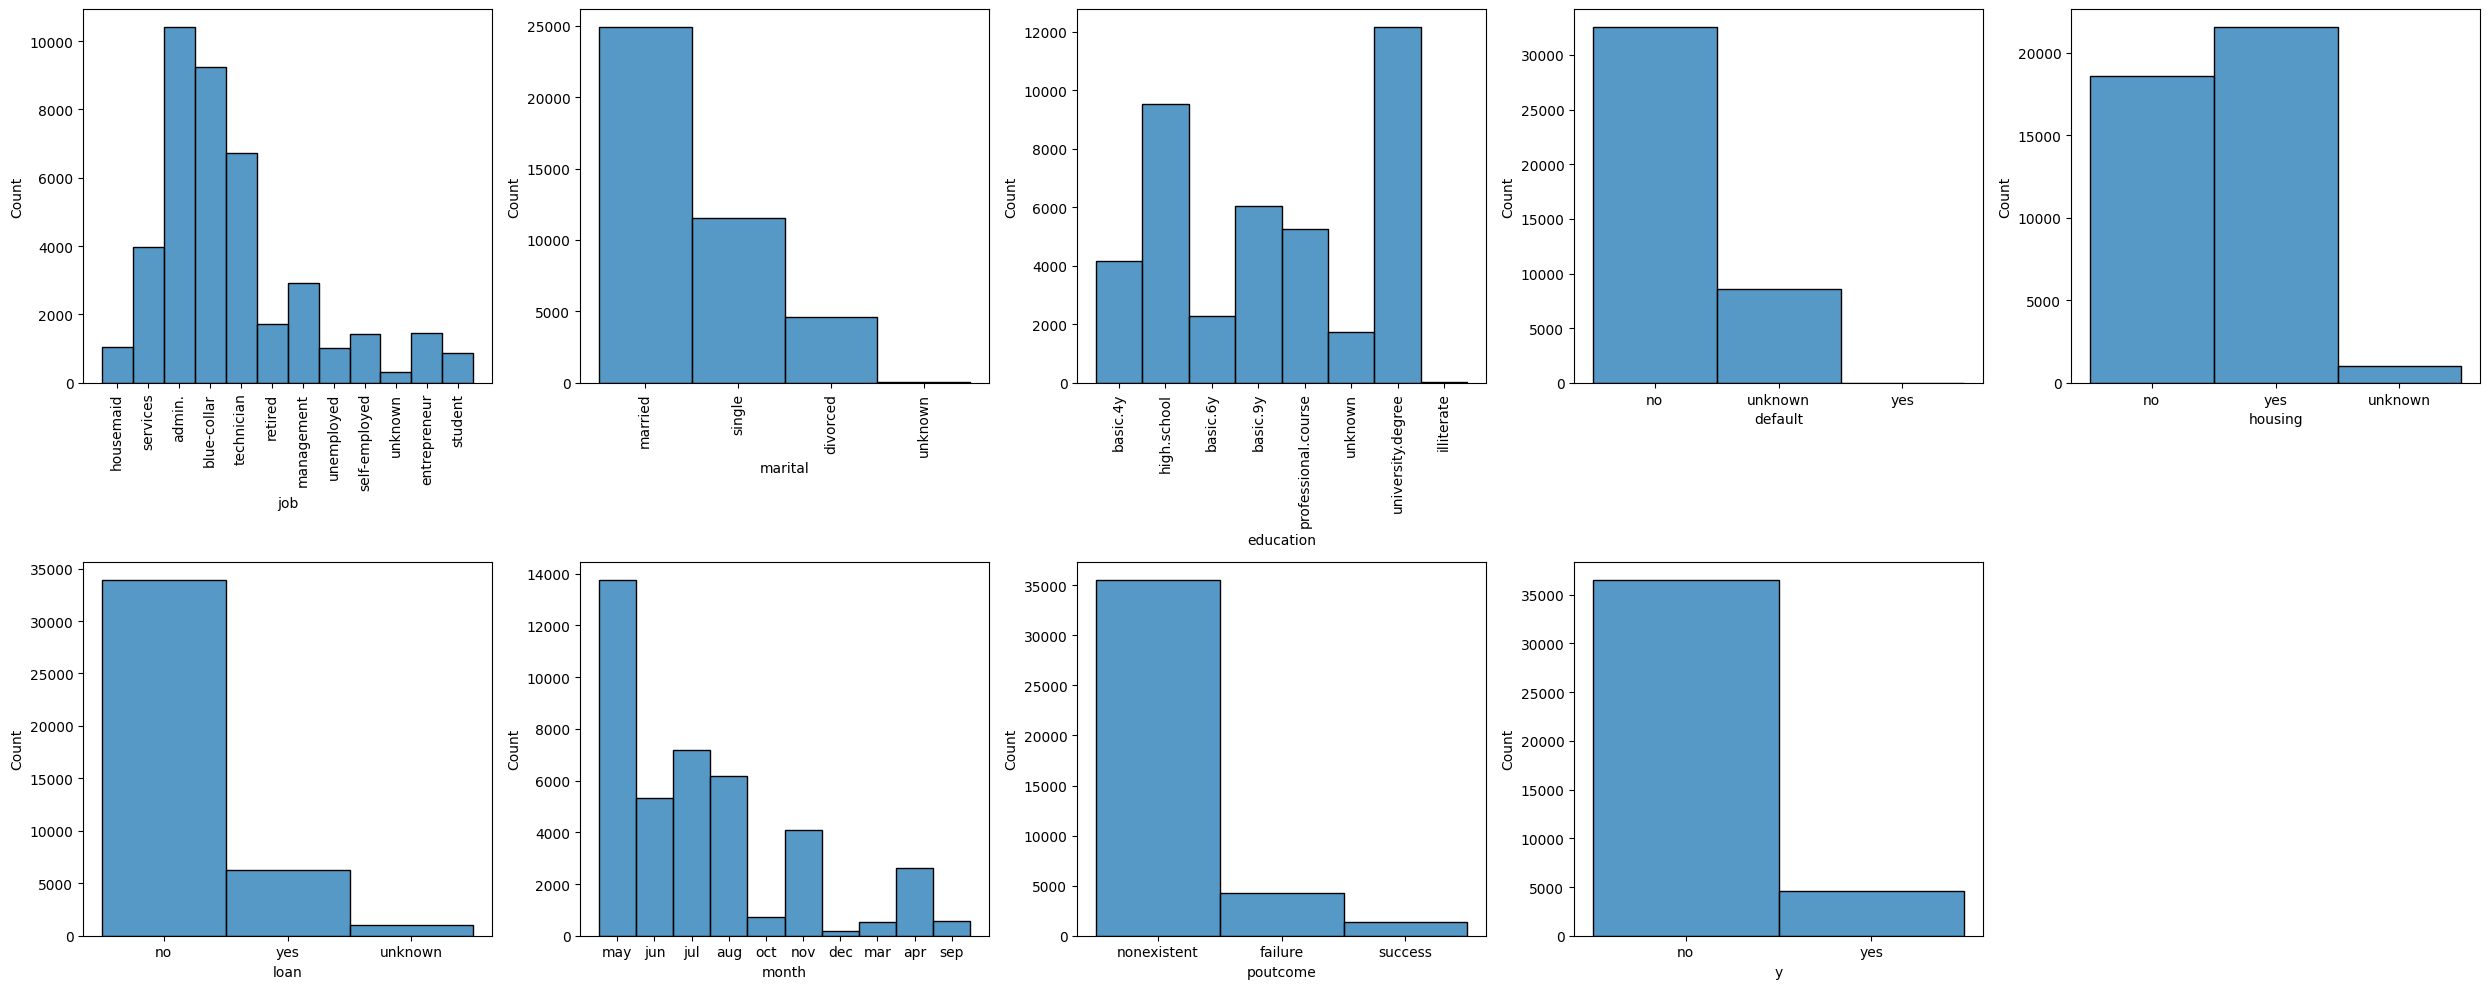

In [10]:
#Análisis sobre variables categóricas

#Se importan las librerias para graficar
import matplotlib.pyplot as plt 
import seaborn as sns

#   Datos categoricos: job,  marital, education, default, housing, loan , month, poutcome, y


fig, axis = plt.subplots(2, 5, figsize = (25, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "job")
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)

sns.histplot(ax = axis[0, 1], data = data, x = "marital")
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)

sns.histplot(ax = axis[0, 2], data = data, x = "education")
axis[0,2].set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)

sns.histplot(ax = axis[0, 3], data = data, x = "default")
sns.histplot(ax = axis[0, 4], data = data, x = "housing")
sns.histplot(ax = axis[1, 0], data = data, x = "loan")
sns.histplot(ax = axis[1, 1], data = data, x = "month")
sns.histplot(ax = axis[1, 2], data = data, x = "poutcome")
sns.histplot(ax = axis[1, 3], data = data, x = "y")
# Ocultar el último cuadrante vacío
axis[1, 4].axis('off')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#Observamos 
# Dentro de los trabajos mas mencionados estan : Admnin, blue-collar , tecnhnician y services 
# La mayoria de las personas registradas estan casadas y ademas con un titulo universitario,  high.school	, basic.9y o profesional.course 
# Gran cantidad de las personas no tienen un credito y existe una parte que desconocemos. si embargo si tiene una parte mayor un prestamo de vivienda , pero no uno personal 
# La mayoria de los clientes se les contacto en mayo 
# Si revisamos la campaña anterior , podemos garantizar que la mayoria no esta registrada o fallo para contratar un deposito a largo plazo 


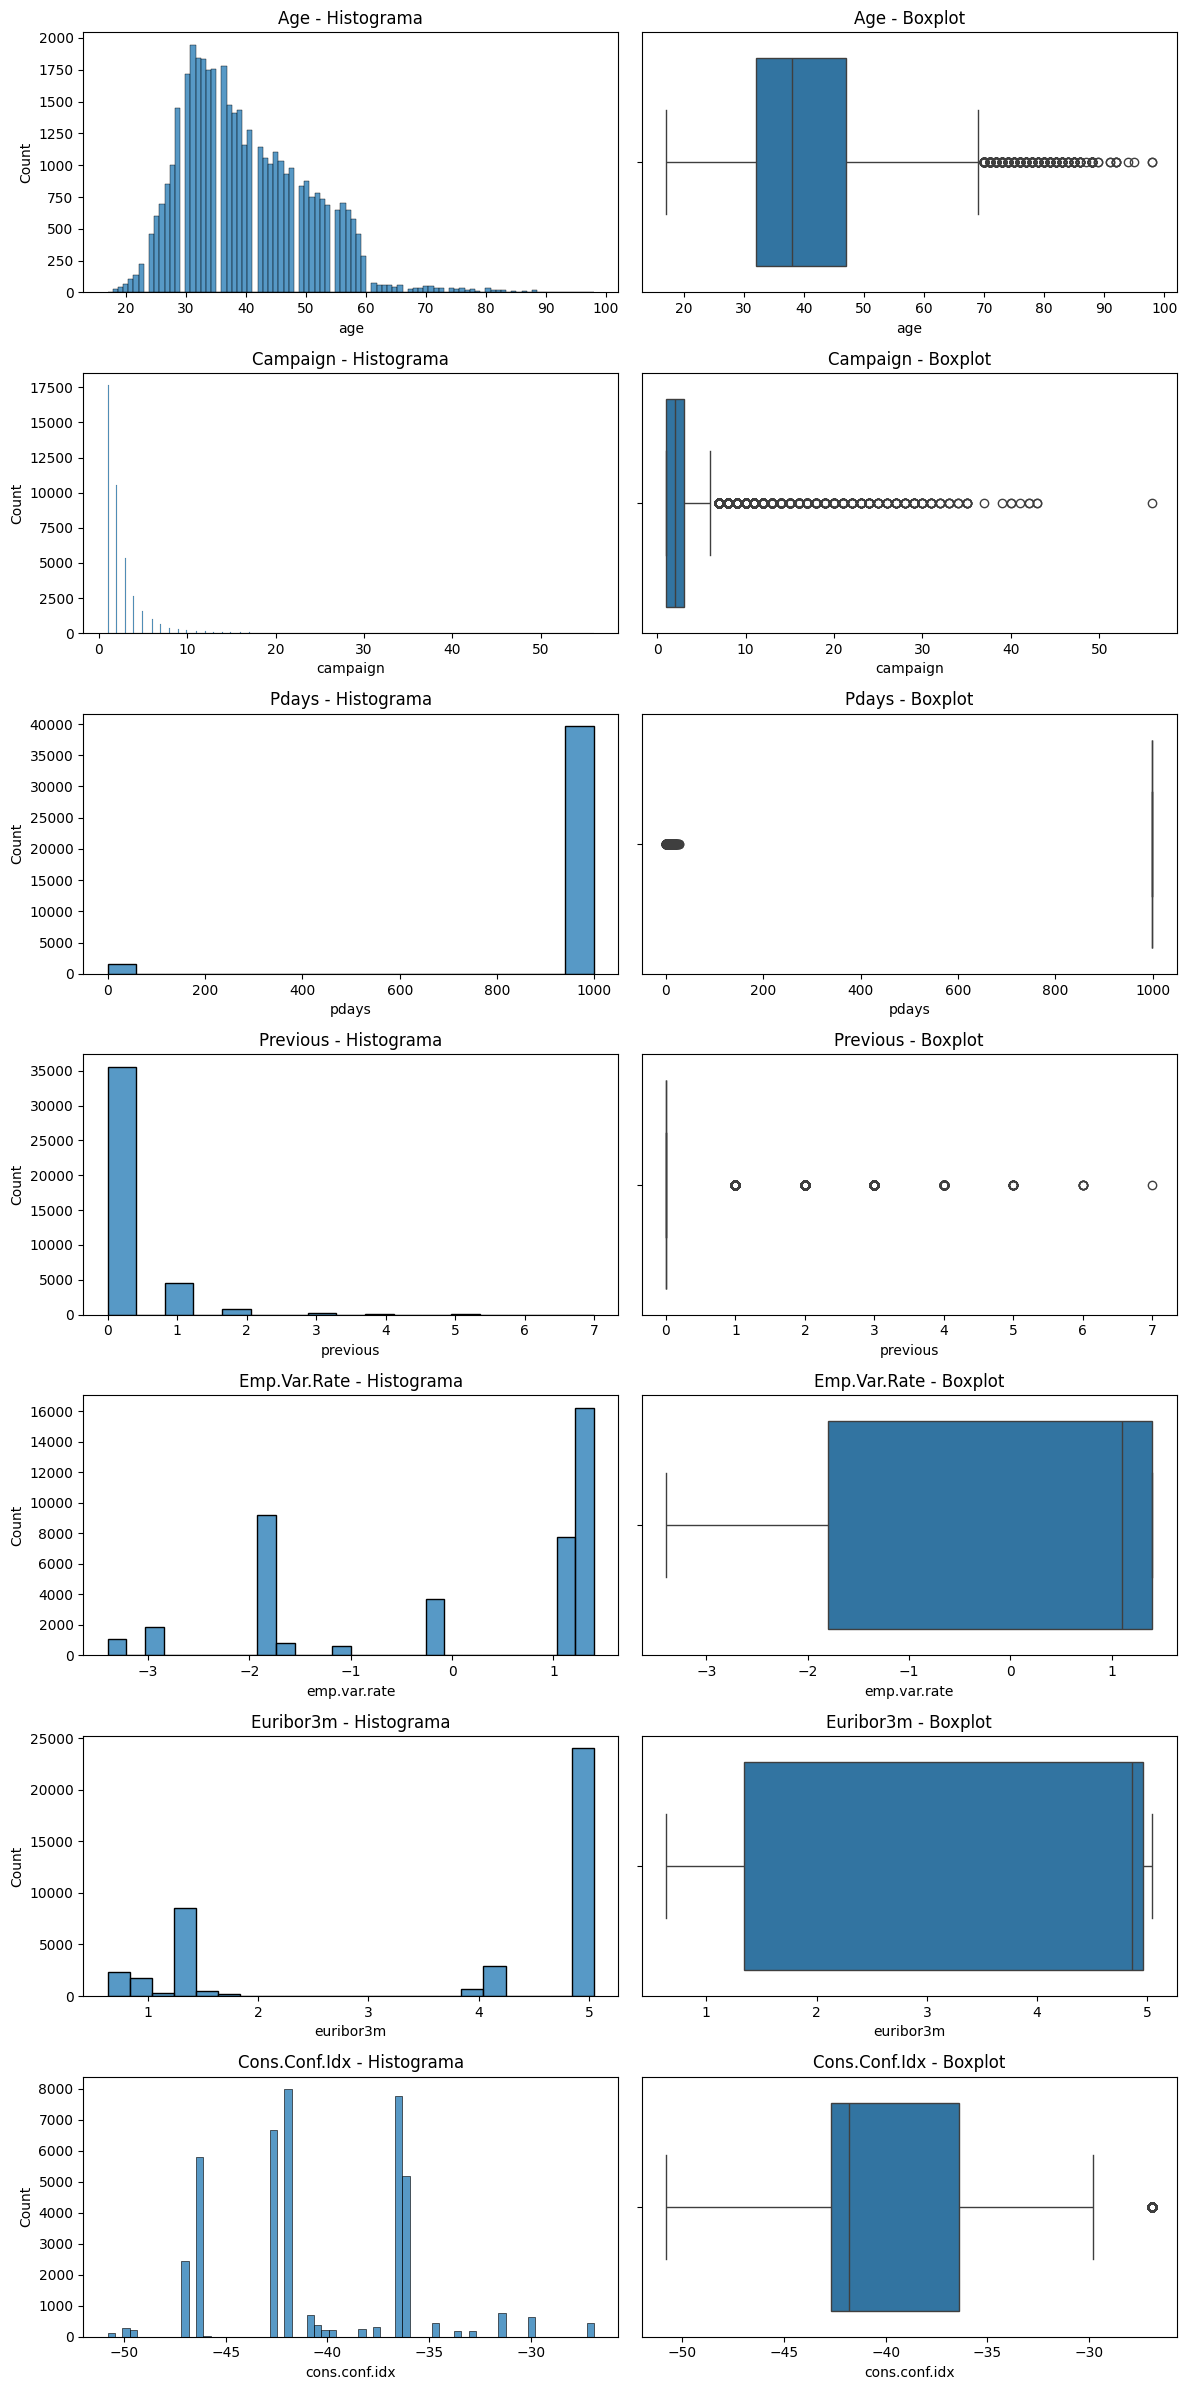

In [11]:
# Análisis sobre variables numéricas
# Datos numericos: age, campaign, pdays, previous, emp.var.rate, euribor3m, cons.conf.idx


# Crear subplots con 7 variables: 4 filas y 2 columnas (histograma y boxplot por cada variable)
fig, axis = plt.subplots(7, 2, figsize=(12, 24))

# Primera fila: age
sns.histplot(ax=axis[0, 0], data=data, x="age")
axis[0, 0].set_title("Age - Histograma")
sns.boxplot(ax=axis[0, 1], data=data, x="age")
axis[0, 1].set_title("Age - Boxplot")

# Segunda fila: campaign
sns.histplot(ax=axis[1, 0], data=data, x="campaign")
axis[1, 0].set_title("Campaign - Histograma")
sns.boxplot(ax=axis[1, 1], data=data, x="campaign")
axis[1, 1].set_title("Campaign - Boxplot")

# Tercera fila: pdays
sns.histplot(ax=axis[2, 0], data=data, x="pdays")
axis[2, 0].set_title("Pdays - Histograma")
sns.boxplot(ax=axis[2, 1], data=data, x="pdays")
axis[2, 1].set_title("Pdays - Boxplot")

# Cuarta fila: previous
sns.histplot(ax=axis[3, 0], data=data, x="previous")
axis[3, 0].set_title("Previous - Histograma")
sns.boxplot(ax=axis[3, 1], data=data, x="previous")
axis[3, 1].set_title("Previous - Boxplot")

# Quinta fila: emp.var.rate
sns.histplot(ax=axis[4, 0], data=data, x="emp.var.rate")
axis[4, 0].set_title("Emp.Var.Rate - Histograma")
sns.boxplot(ax=axis[4, 1], data=data, x="emp.var.rate")
axis[4, 1].set_title("Emp.Var.Rate - Boxplot")

# Sexta fila: euribor3m
sns.histplot(ax=axis[5, 0], data=data, x="euribor3m")
axis[5, 0].set_title("Euribor3m - Histograma")
sns.boxplot(ax=axis[5, 1], data=data, x="euribor3m")
axis[5, 1].set_title("Euribor3m - Boxplot")

# Séptima fila: cons.conf.idx
sns.histplot(ax=axis[6, 0], data=data, x="cons.conf.idx")
axis[6, 0].set_title("Cons.Conf.Idx - Histograma")
sns.boxplot(ax=axis[6, 1], data=data, x="cons.conf.idx")
axis[6, 1].set_title("Cons.Conf.Idx - Boxplot")

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#Observamos: 
# Las personas registradas ronda desde los 32 a 48 años en su mayoria. Presenta los datos con una ligera distribucion normal , sin embargo tenemos datos dispersos
# Por lo menos una vez se ha contadado al cliente en esta campaña . Mientras que en la campaña anterior , gran parte no fue contactada 
# la cantidad de veces que fueron contactados presenta muchos datos disperos , siendo atípicos que están lejos de la distribución estándar y que sus distribuciones son asimétricos. al igual que Previous 
# El indicador de confianza tiene datos erroneos que no nos ayudaran mas adelante (en negativo)




4. Análisis de variables multivariadas

/tmp/ipykernel_1432/127517869.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


/tmp/ipykernel_1432/127517869.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,2].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


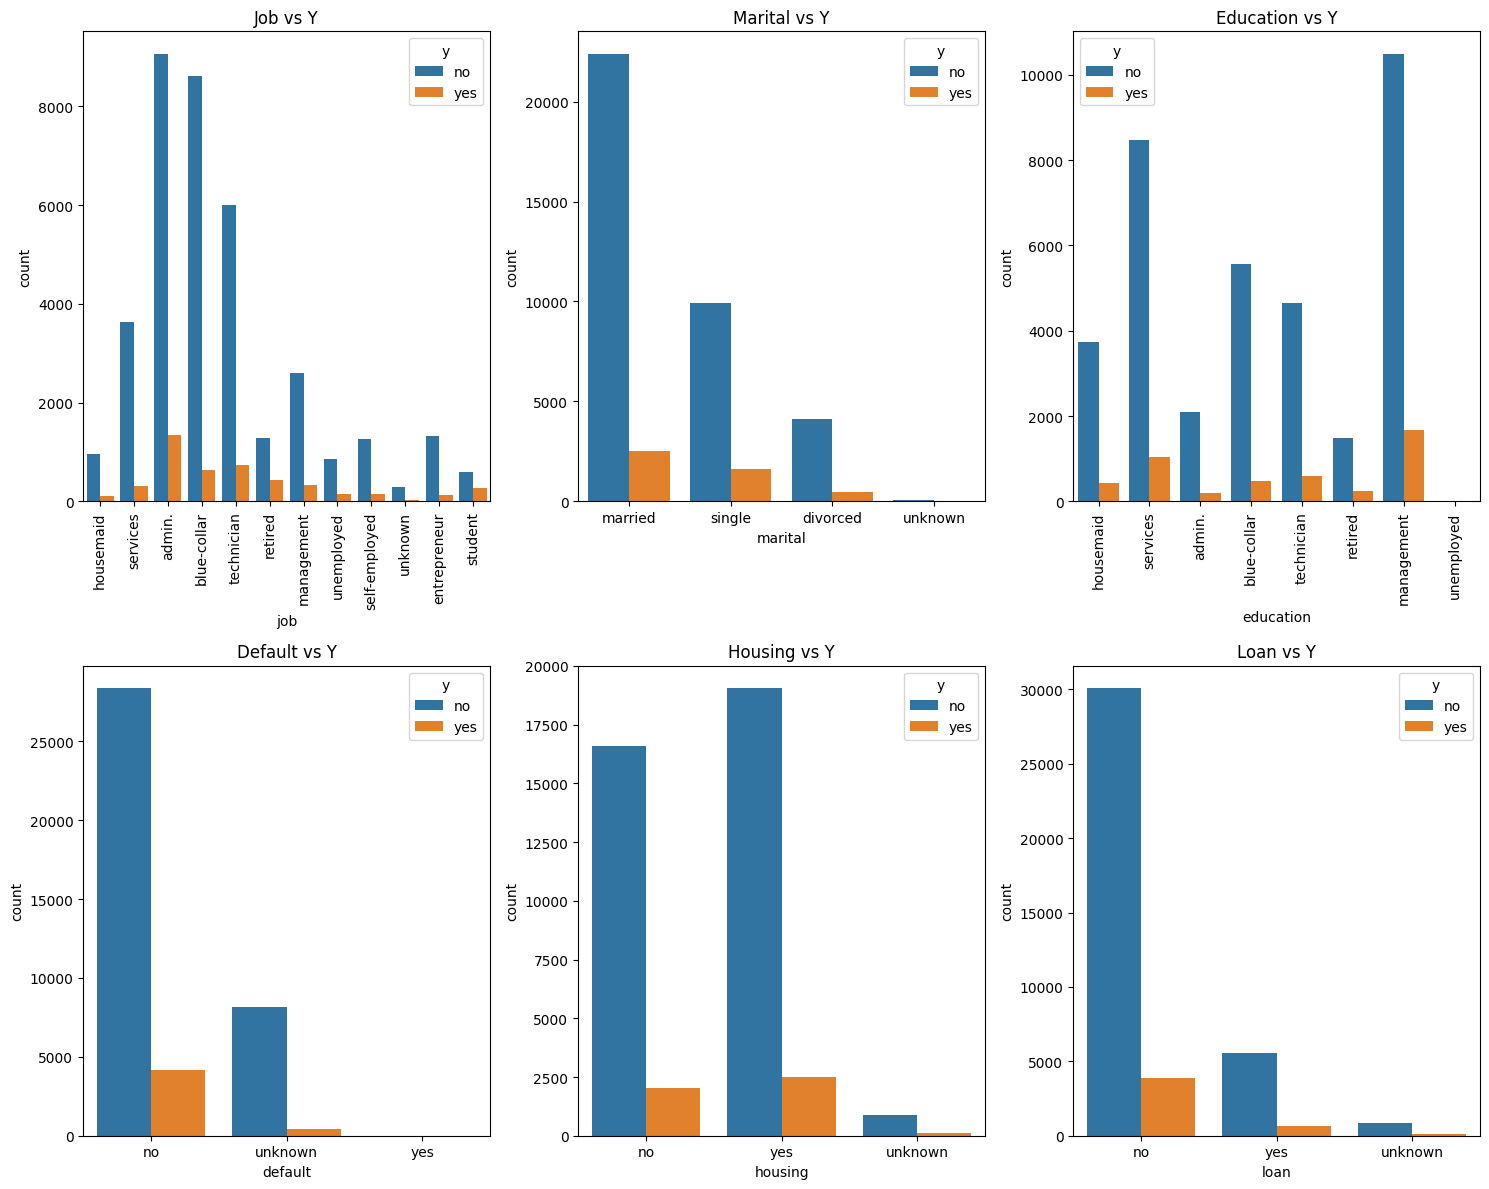

In [12]:
# Análisis categórico-categórico
# Datos categoricos: job, marital, education, default, housing, loan, y

# Crear subplots con 3 filas y 3 columnas
fig, axis = plt.subplots(2, 3, figsize=(15, 12))

# Primera fila
sns.countplot(ax=axis[0, 0], data=data, x="job", hue="y")
axis[0, 0].set_title("Job vs Y")
axis[0,0].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


sns.countplot(ax=axis[0, 1], data=data, x="marital", hue="y")
axis[0, 1].set_title("Marital vs Y")

sns.countplot(ax=axis[0, 2], data=data, x="education", hue="y")
axis[0, 2].set_title("Education vs Y")
axis[0,2].set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)


# Segunda fila
sns.countplot(ax=axis[1, 0], data=data, x="default", hue="y")
axis[1, 0].set_title("Default vs Y")

sns.countplot(ax=axis[1, 1], data=data, x="housing", hue="y")
axis[1, 1].set_title("Housing vs Y")

sns.countplot(ax=axis[1, 2], data=data, x="loan", hue="y")
axis[1, 2].set_title("Loan vs Y")


# Ajustar el layout para que los gráficos no se solapen
plt.tight_layout()

# Mostrar gráficos
plt.show()

#Observamos:
# La mayoria de las personas registradas que no tienen un credito, se visualizan a que  harian un deposito a largo plazo . 
# Por otra parte, se visualiza una respuesta un poco positiva en los trabajos de Admin y technician. Al igual que las personas que estan casadas 
# Las personas que tienen un credito personal, se visualiza que tienen menos tendencia a realizar un deposito a largo plazo 

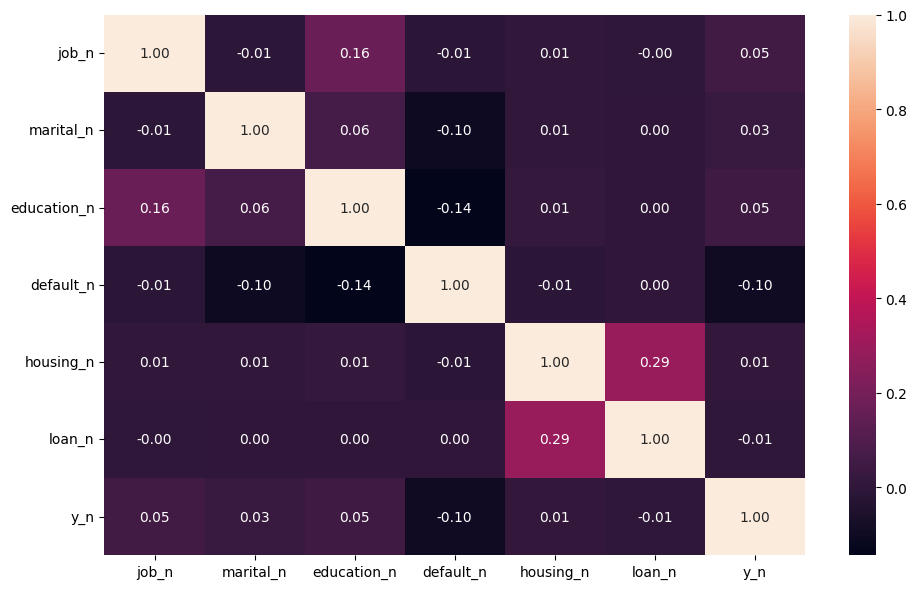

In [13]:
# Análisis de correlaciones 
# Datos categoricos: job, marital, education, default, housing, loan, y

data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["y_n"] = pd.factorize(data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# Se observa: 
# Existe una relacion entre los que tienen un credito de vivienda y uno personal (0.29) . Al igual que con el tipo de eduacion y el trabajo de un 0.16
# Por otra parte hay una relacion negativa fuerte, en los que tienen un credito y el tipo marital (-0.14)

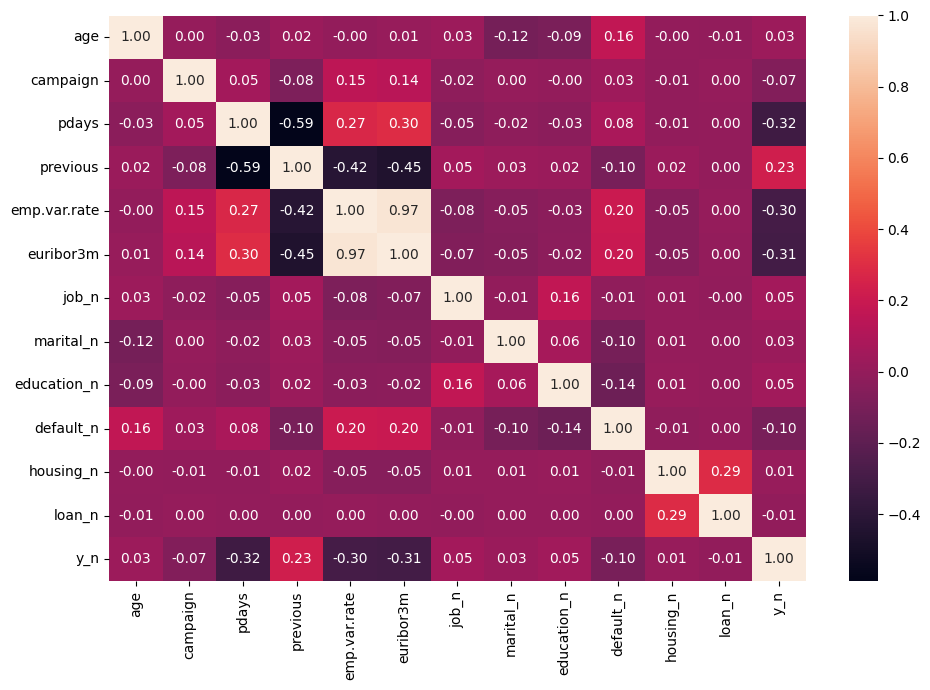

In [14]:
#Análisis numérico-categórico
# Datos numericos: age, campaign, pdays, previous, emp.var.rate, euribor3m, cons.conf.idx
# Datos categoricos: job, marital, education, default, housing, loan, y

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data[["age", "campaign", "pdays", "previous", "emp.var.rate", "euribor3m", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# Se observa : 
# como vimos en el grafico anterior hay una relacion entre los que tienen un credito de vivienda y uno personal (0.29)
# 


In [15]:
#Analisis de todos los datos 

sns.pairplot(data = data)